In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_excel('http://taanila.fi/ENB2012_data.xlsx')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [3]:
energia=df
energia.columns= ["Relative Compactness", "Surface Area", "Wall Area", "Roof Area", "Overall Height","Orientation",
              "Glazing Area", "Glazing Area Distribution", "Heating Load", "Cooling Load"]
# df.columns = ['a', 'b']
energia.head(50)

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.550,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.550,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.550,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.550,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.840,28.28
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,21.460,25.38
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.710,25.16
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.680,29.60
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0,19.500,27.30
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0,19.950,21.97


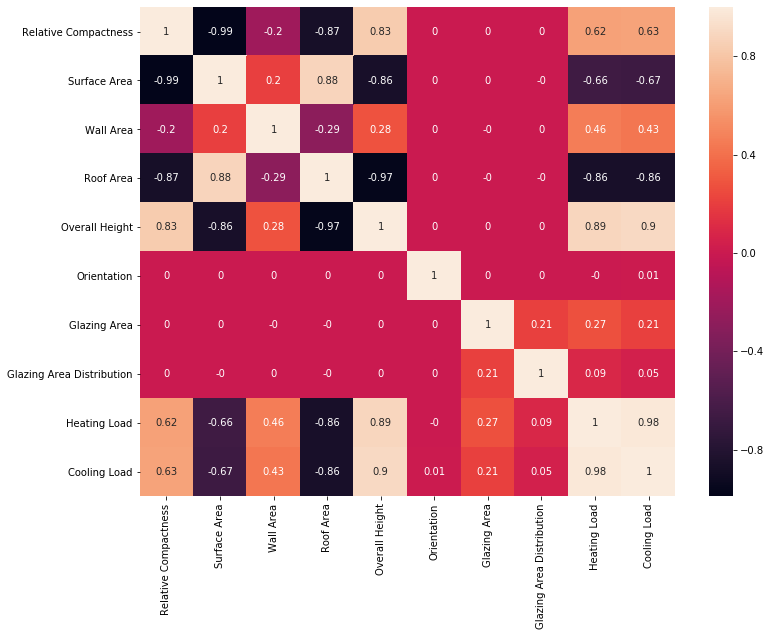

In [4]:
correlation_matrix = energia.corr().round(2)
plt.figure(figsize=(12,9))
sns.heatmap(data=correlation_matrix, annot =True)

In [5]:
#roofarea, overallH
energia.shape

(768, 10)

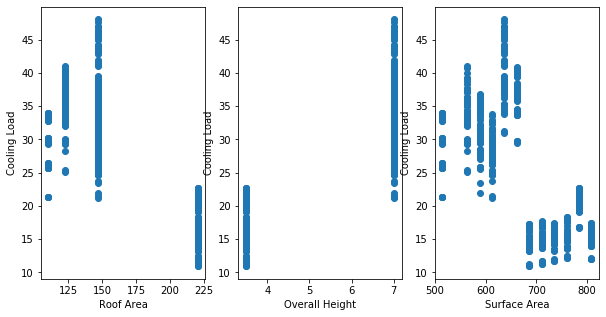

In [6]:
features=["Roof Area", "Overall Height", "Surface Area"]
target=energia["Cooling Load"]

plt.figure(figsize=(10,5))

for i, feature in enumerate(features): 
    plt.subplot(1, len(features), i+1)
    plt.scatter(energia[feature], target)
    plt.xlabel(feature)
    plt.ylabel("Cooling Load")

In [7]:
X = df[["Roof Area", "Overall Height", "Surface Area"]] #valitaan ne, joilla korkein korrelaatio
y = df["Cooling Load"]

In [8]:
from sklearn.linear_model import LinearRegression
malli=LinearRegression().fit(X, y)

In [9]:
malli.coef_

array([-0.03719531,  5.77062039,  0.04255898])

In [10]:
malli.score(X,y)

0.8386283406635316

In [11]:
X = df[["Roof Area", "Overall Height"]]
y = df["Cooling Load"]

In [12]:
from sklearn.linear_model import LinearRegression
malli=LinearRegression().fit(X, y)
malli.score(X,y) #jos surface area -muuttuja poistetaan, mallin selityskerroin huononee

0.8038000431643828

Text(0, 0.5, 'Poikkeama todellisesta')

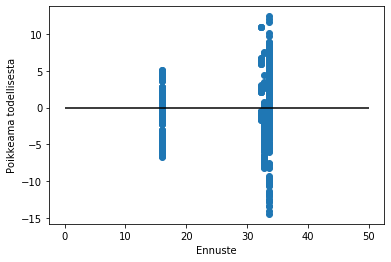

In [13]:
plt.scatter(malli.predict(X), malli.predict(X)-y)
plt.hlines(y=0, xmin=0, xmax=50 )
plt.xlabel("Ennuste")
plt.ylabel("Poikkeama todellisesta") #ennustevirheet satunnaisia -> hyvä juttu

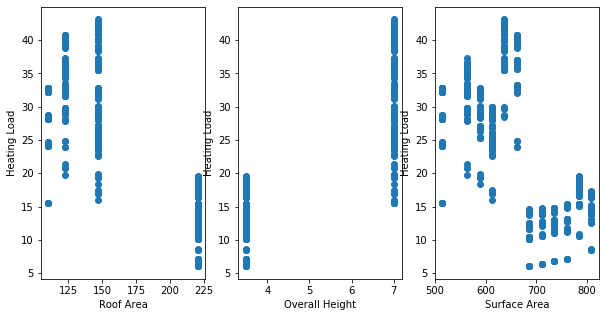

In [15]:
features=["Roof Area", "Overall Height", "Surface Area"]
target=energia["Heating Load"]

plt.figure(figsize=(10,5))

for i, feature in enumerate(features): 
    plt.subplot(1, len(features), i+1)
    plt.scatter(energia[feature], target)
    plt.xlabel(feature)
    plt.ylabel("Heating Load")

In [17]:
betoni=pd.read_excel('http://taanila.fi/Concrete_Data.xlsx')
betoni.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [20]:
# df.columns = ['a', 'b']
betoni.columns = ["Cement", "Blast Furnace Slag", "Fly Ash", "Water", "Superplasticizer", "Coarse Aggregate",
                  "Fine Aggregate", "Age", "Concr. compressive strength"]
betoni.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concr. compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


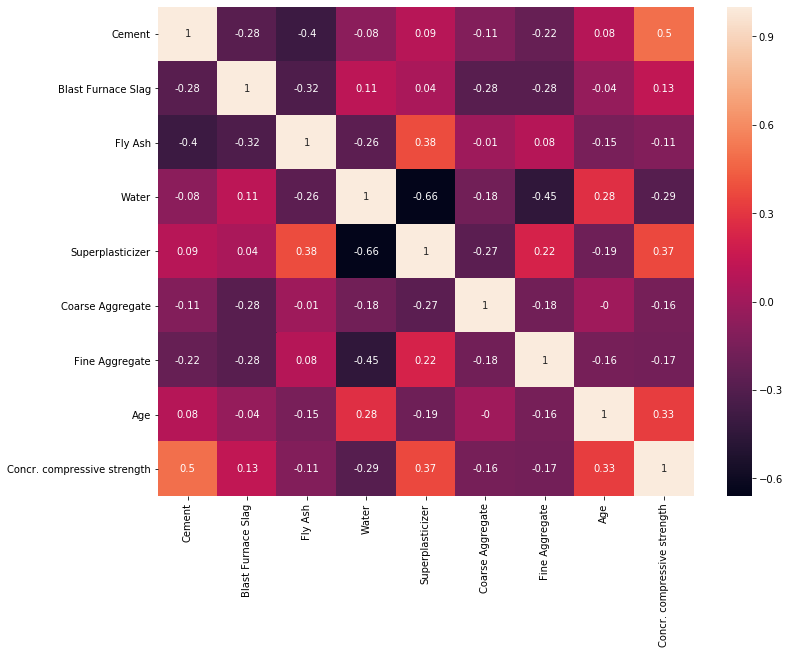

In [21]:
correlation_matrix = betoni.corr().round(2)
plt.figure(figsize=(12,9))
sns.heatmap(data=correlation_matrix, annot =True)